## Data cleaning

In [2]:
# load dependency
import json
import numpy as np
import pandas as pd

In [3]:
# loading a dataset
# this is a large dataset that contains details for tracks that I like and dislike
complete = pd.read_csv("../large_playlist.csv", index_col=0)
print(complete.shape)  # 522 rows, 22 cols
complete.head()

(522, 22)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,Title,first_artist,all_artists,duration_ms,time_signature,like,purpose,num_bars,num_sections,num_segments
0,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,...,Changing Places,Leyton Miller,['Leyton Miller'],176500,4,True,meditation,43,9,449
1,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,...,Message from the Other Lands,Lama House,['Lama House'],221413,4,True,meditation,45,10,537
2,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,...,Nocturno,Henrietta Dubois,['Henrietta Dubois'],129326,4,True,meditation,65,7,403
3,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,...,Older,Lionheart,['Lionheart'],188026,3,True,meditation,87,10,637
4,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,...,Frangibility,Spheres,['Spheres'],201000,4,True,meditation,107,11,655


In [3]:
# encode the like as 1 and dislike as 0
complete["like"] = pd.Categorical(complete["like"])
complete["like_songs"] = complete["like"].cat.codes
complete.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,first_artist,all_artists,duration_ms,time_signature,like,purpose,num_bars,num_sections,num_segments,like_songs
0,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,...,Leyton Miller,['Leyton Miller'],176500,4,True,meditation,43,9,449,1
1,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,...,Lama House,['Lama House'],221413,4,True,meditation,45,10,537,1
2,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,...,Henrietta Dubois,['Henrietta Dubois'],129326,4,True,meditation,65,7,403,1
3,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,...,Lionheart,['Lionheart'],188026,3,True,meditation,87,10,637,1
4,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,...,Spheres,['Spheres'],201000,4,True,meditation,107,11,655,1


In [4]:
# turn the category into numerical
complete["like_songs"].astype("int64")
complete.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,first_artist,all_artists,duration_ms,time_signature,like,purpose,num_bars,num_sections,num_segments,like_songs
0,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,...,Leyton Miller,['Leyton Miller'],176500,4,True,meditation,43,9,449,1
1,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,...,Lama House,['Lama House'],221413,4,True,meditation,45,10,537,1
2,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,...,Henrietta Dubois,['Henrietta Dubois'],129326,4,True,meditation,65,7,403,1
3,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,...,Lionheart,['Lionheart'],188026,3,True,meditation,87,10,637,1
4,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,...,Spheres,['Spheres'],201000,4,True,meditation,107,11,655,1


In [5]:
# drop columns that are not needed or in string
cols = ["first_artist", "all_artists", "id", "like", "purpose"]
songs = complete.copy()
songs = songs.drop(cols, axis=1)
songs.shape

(522, 18)

In [6]:
# rearrange the columns
columns = ['Title','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'num_bars',
       'num_sections', 'num_segments', 'like_songs']
songs = songs[columns]
songs.head() 

,Title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,like_songs
0,Changing Places,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,60.027,176500,4,43,9,449,1
1,Message from the Other Lands,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,49.928,221413,4,45,10,537,1
2,Nocturno,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,125.385,129326,4,65,7,403,1
3,Older,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,86.292,188026,3,87,10,637,1
4,Frangibility,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,159.506,201000,4,107,11,655,1


In [7]:
# create another df for prediction
prediction = songs.drop(["Title"], axis=1)
prediction.head()  # now it's all just int

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,like_songs
0,0.163,0.0363,9,-28.038,1,0.0422,0.971,0.870,0.0937,0.0751,60.027,176500,4,43,9,449,1
1,0.290,0.3320,10,-13.058,1,0.0302,0.539,0.967,0.1900,0.0374,49.928,221413,4,45,10,537,1
2,0.326,0.2000,4,-20.150,0,0.0386,0.991,0.943,0.0867,0.4190,125.385,129326,4,65,7,403,1
3,0.361,0.1220,2,-11.416,0,0.0364,0.983,0.820,0.0870,0.2770,86.292,188026,3,87,10,637,1
4,0.115,0.0664,1,-26.363,1,0.0405,0.958,0.924,0.0817,0.0380,159.506,201000,4,107,11,655,1


# Pytorch

In [8]:
# mode and keys are category
# turn them into category
cat_col = ["mode", "key"]
for col in cat_col:
    prediction[col] = prediction[col].astype("category")

## Partition the data into training and testing

In [9]:
# separate the data
from sklearn.model_selection import train_test_split
x = prediction.drop("like_songs", axis=1)
y = prediction["like_songs"]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=0)

## Pre-process training input data

In [10]:
# turn the categorical into tensor
import torch
cat_data = np.stack([x_train[col].values for col in cat_col], 1)
cat_data = torch.tensor(cat_data, dtype=torch.int64)

In [11]:
# Pytorch model training needs the numerical column to be converted to tensor
numerical_columns = [col for col in x_train.columns if col not in cat_col]  # the numerical column which is not categorical
numerical_data = np.stack([x_train[col].values for col in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)

### preprocess the training output data

In [12]:
output_train = torch.tensor(y_train.values, dtype=torch.int64).flatten()
output_train[:5]

tensor([1, 0, 1, 0, 0])

## Pre-process testing input data

In [13]:
# turn the categorical into tensor
import torch
test_cat_data = np.stack([x_test[col].values for col in cat_col], 1)
test_cat_data = torch.tensor(test_cat_data, dtype=torch.int64)

In [14]:
# Pytorch model training needs the numerical column to be converted to tensor
test_numerical_columns = [col for col in x_train.columns if col not in cat_col]  # the numerical column which is not categorical
test_num_data = np.stack([x_test[col].values for col in test_numerical_columns], 1)
test_num_data = torch.tensor(test_num_data, dtype=torch.float)

### preprocess the testing output data

In [15]:
output_test = torch.tensor(y_test.values, dtype=torch.int64).flatten()
output_test[:5]

tensor([0, 0, 1, 0, 0])

## Embedding

In [16]:
categorical_column_sizes = [len(prediction[column].cat.categories) for column in cat_col]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(2, 1), (12, 6)]


## Model for prediction

In [17]:
import torch.nn as nn
class Model(nn.Module):

    def __init__(self, embedding_size, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)

        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x

## Training

In [30]:
model = Model(categorical_embedding_sizes, numerical_data.shape[1], 2, [200,183,50], p=0.5)
# 2 output because there are only two possible outputs
# 3 hidden layers with 200, 183, 50 neurons

In [31]:
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(12, 6)
  )
  (embedding_dropout): Dropout(p=0.5, inplace=False)
  (batch_norm_num): BatchNorm1d(14, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=21, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=200, out_features=183, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(183, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=183, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=50, out_features=2, bias=True)
  )
)


### Loss function and optimizer

In [32]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Training the model

In [33]:
epochs = 600
aggregated_losses = []

for i in range(epochs):
    i += 1
    y_pred = model(cat_data, numerical_data)
    single_loss = loss_function(y_pred, output_train)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.81781387
epoch:  26 loss: 0.22794656
epoch:  51 loss: 0.19874334
epoch:  76 loss: 0.17372584
epoch: 101 loss: 0.17789780
epoch: 126 loss: 0.17046070
epoch: 151 loss: 0.14912239
epoch: 176 loss: 0.13875522
epoch: 201 loss: 0.11535733
epoch: 226 loss: 0.09740309
epoch: 251 loss: 0.11873350
epoch: 276 loss: 0.11681627
epoch: 301 loss: 0.09206560
epoch: 326 loss: 0.08485291
epoch: 351 loss: 0.08231402
epoch: 376 loss: 0.07604145
epoch: 401 loss: 0.07920041
epoch: 426 loss: 0.06582687
epoch: 451 loss: 0.08066602
epoch: 476 loss: 0.04752553
epoch: 501 loss: 0.07021150
epoch: 526 loss: 0.05654576
epoch: 551 loss: 0.05346158
epoch: 576 loss: 0.06535769
epoch: 600 loss: 0.0397726148


Text(0.5, 1.0, 'Losses over Epochs')

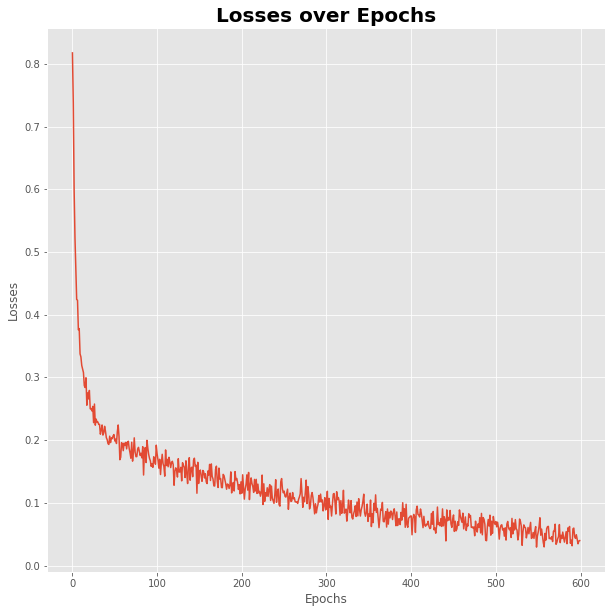

In [34]:
# plot the loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.figure(figsize=(10,10))
plt.plot(range(epochs), aggregated_losses)
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Losses over Epochs", fontweight="bold", fontsize=20)

## Prediction

In [35]:
# no_grad will turn off gradient calculation as to avoid calling tensor.backward()
with torch.no_grad():
    y_val = model(test_cat_data, test_num_data)
    loss = loss_function(y_val, output_test)
print(f'Loss: {loss:.8f}')  # the loss is 0.29 which is bigger than the loss we got in training,the model is overfitting

Loss: 0.22718473


In [36]:
y_val = np.argmax(y_val, axis=1)
y_val[:10]

tensor([0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

## Validation

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(output_test, y_val))
print(classification_report(output_test, y_val))

[[68  3]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.91      0.91      0.91        34

    accuracy                           0.94       105
   macro avg       0.93      0.93      0.93       105
weighted avg       0.94      0.94      0.94       105



The average accuracy is 0.91, and both the precision and the recall are fairly high